In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Traffic Flow Model

We can apply the techniques we have learned to a simple model of traffic flow.  We will consider a one-dimensional model of traffic flow on a circular road of length $L$.  The density of cars on the road is $\rho(x,t)$, where $x$ is the position along the road and $t$ is time.  The traffic flow is $F(x,t) = \rho(x,t) v(x,t)$, where $v(x,t)$ is the velocity of the cars.  The velocity depends on the density of cars, with a maximum velocity $v_{max}$ at zero density and zero velocity at maximum density $\rho_{max}$.  A reasonable model for the velocity is

$$v(x,t) = v_{max} \left( 1 - \frac{\rho(x,t)}{\rho_{max}} \right)$$

The traffic flow is then

$$F(x,t) = \rho(x,t) v(x,t) = \rho(x,t) v_{max} \left( 1 - \frac{\rho(x,t)}{\rho_{max}} \right)$$

The rate of change of the density is then

$$\frac{\partial \rho}{\partial t} = - \frac{\partial F}{\partial x} = - \frac{\partial}{\partial x} \left( \rho(x,t) v_{max} \left( 1 - \frac{\rho(x,t)}{\rho_{max}} \right) \right)$$

We will use the following initial conditions:

$$\rho(x,0) = \left\{ \begin{array}{ll} \rho_{max} & \mbox{if } -L/2+L/16 \le x \le -L/2+L/8 \\ 0 & \mbox{otherwise} \end{array} \right.$$

and periodic boundary conditions:

$$\rho(-L/2,t) = \rho(L/2,t)$$

We will use the following parameters:

$$L = 1600 \mbox{ m}$$
$$v_{max} = 25 \mbox{ m/s}$$
$$\rho_{max} = 1 \mbox{ car/m}$$

We can employ the following finite difference approximations (using a forward difference in time and a centered difference in space):

$$\frac{\partial \rho}{\partial t} \approx \frac{\rho(x,t+\Delta t) - \rho(x,t)}{\Delta t}$$

$$\frac{\partial \rho}{\partial x} \approx \frac{\rho(x+\Delta x,t) - \rho(x-\Delta x,t)}{2 \Delta x}$$

We can then write the following finite difference equation:

$$\frac{\rho(x,t+\Delta t) - \rho(x,t)}{\Delta t} = - \frac{v_{max}}{2 \Delta x} \left( \rho(x+\Delta x,t) \left( 1 - \frac{\rho(x+\Delta x,t)}{\rho_{max}} \right) - \rho(x-\Delta x,t) \left( 1 - \frac{\rho(x-\Delta x,t)}{\rho_{max}} \right) \right)$$

We can rearrange this equation to obtain an explicit finite difference equation for $\rho(x,t+\Delta t)$:

$$\rho(x,t+\Delta t) = \rho(x,t) - \frac{v_{max} \Delta t}{2 \Delta x} \left( \rho(x+\Delta x,t) \left( 1 - \frac{\rho(x+\Delta x,t)}{\rho_{max}} \right) - \rho(x-\Delta x,t) \left( 1 - \frac{\rho(x-\Delta x,t)}{\rho_{max}} \right) \right)$$

The above equation is known as the Forward-Time Centered-Space (FTCS) finite difference equation.  It is a first-order accurate finite difference equation in time and second-order accurate in space.  It is also unstable for any choice of $\Delta t$ and $\Delta x$!!!!

How can we fix this problem?  

In the Lax method, we replace the density at the current time step with the average of the densities at the neighboring grid points:

$$\rho(x,t) \rightarrow \frac{1}{2} \left( \rho(x+\Delta x,t) + \rho(x-\Delta x,t) \right)$$

In this way, we obtain the following finite difference equation:

$$\rho(x,t+\Delta t) = \frac{1}{2} \left( \rho(x+\Delta x,t) + \rho(x-\Delta x,t) \right) - \frac{v_{max} \Delta t}{2 \Delta x} \left( \rho(x+\Delta x,t) \left( 1 - \frac{\rho(x+\Delta x,t)}{\rho_{max}} \right) - \rho(x-\Delta x,t) \left( 1 - \frac{\rho(x-\Delta x,t)}{\rho_{max}} \right) \right)$$

This is a first-order accurate finite difference equation in time and space.  It is also stable for any choice of $\Delta t$ and $\Delta x$ as long as the CFL condition is satisfied:

$$\frac{v_{max} \Delta t}{\Delta x} \le 1$$

In the Lax-Wendroff method, we replace the density at the current time step with the average of the densities at the neighboring grid points and the density at the next time step with the average of the densities at the neighboring grid points at the next time step:

$$\rho(x,t) \rightarrow \frac{1}{2} \left( \rho(x+\Delta x,t) + \rho(x-\Delta x,t) \right)$$

$$\rho(x,t+\Delta t) \rightarrow \frac{1}{2} \left( \rho(x+\Delta x,t+\Delta t) + \rho(x-\Delta x,t+\Delta t) \right)$$

In this way, we obtain the following finite difference equation:

$$\rho(x,t+\Delta t) = \frac{1}{2} \left( \rho(x+\Delta x,t+\Delta t) + \rho(x-\Delta x,t+\Delta t) \right) - \frac{v_{max} \Delta t}{2 \Delta x} \left( \rho(x+\Delta x,t) \left( 1 - \frac{\rho(x+\Delta x,t)}{\rho_{max}} \right) - \rho(x-\Delta x,t) \left( 1 - \frac{\rho(x-\Delta x,t)}{\rho_{max}} \right) \right)$$

This is a second-order accurate finite difference equation in time and space.  It is also stable for any choice of $\Delta t$ and $\Delta x$ as long as the CFL condition is satisfied:

$$\frac{v_{max} \Delta t}{\Delta x} \le 1$$




In [118]:
# 1D traffic flow model
method = 2 # 1 = FTCS, 2 = Lax, 3 = Lax-Wendroff


In [119]:
N = 81 # number of grid points in x
tau = 0.2 # time step in t
L = 1600.0 # system size in meters
h = L/(N-1)
v_max = 25.0 # in m/s ... approx. 50 mph

coeff = tau/(2.0*h)
coefflw = tau**2/(2*h**2)

print ('Stability Condition => ',coeff*v_max)

nStep = 2400

print ('End time = ',nStep*tau)

Stability Condition =>  0.125
End time =  480.0


In [120]:
#
# Initial conditions
#
rho_max = 1.0
Flow = np.empty(N)
cp = np.empty(N); cm = np.empty(N)

# Initial setup is a square pulse 
rho = np.zeros(N)
for i in range(int(N/16),int(N/8)):
    rho[i] = rho_max

# Set the initial density values at the edges to rho_max/2
rho[int(N/8)]=rho_max/2.0 
rho[int(N/16)]=rho_max/2.0

# Periodic boundary conditions
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

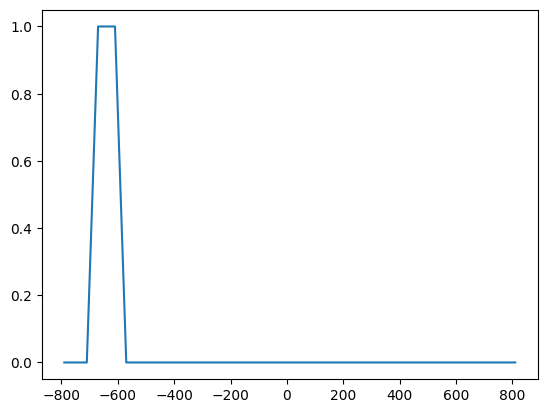

In [121]:
iplot = 1
xplot = (np.arange(N)+1./2.)*h-L/2.0
rplot = np.empty((N,nStep+1))
rplot[:,0]=np.copy(rho)

plt.plot(xplot,rplot[:,0])

In [122]:
tplot = np.empty(nStep+1)
tplot[0] = 0

for istep in range(nStep):
    
    # Compute the Flow = (density)*(velocity)
    Flow[:] = rho[:] * (v_max*(1 - rho[:]/rho_max))
    
    if method == 1:
        # FTCS method
        rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im])
    elif method == 2:
        # Lax method
        rho[:] = 0.5*(rho[ip]+rho[im]) - coeff*(Flow[ip]-Flow[im])
    else:
        # Lax-Wendroff Method
        cp[:] = v_max*(1 - (rho[ip]+rho[:])/rho_max)
        cm[:] = v_max*(1 - (rho[:]+rho[im])/rho_max)
        rho[:] = rho[:] - coeff*(Flow[ip]-Flow[im]) + coefflw*(cp[:]*(Flow[ip]-Flow[:]) - cm[:]*(Flow[:]-Flow[im]))
    
    rplot[:,iplot] = np.copy(rho)
    tplot[iplot] = tau*(istep+1)

    iplot += 1

In [123]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

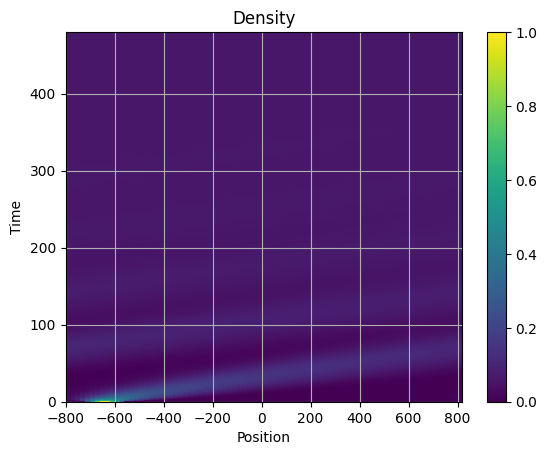

In [124]:
nplots = iplot
plt.figure()
X, T = np.meshgrid(xplot, tplot[:nplots])
plt.pcolormesh(X, T, rplot.T, shading='auto')
plt.colorbar()
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Density")
plt.grid()

plt.show()

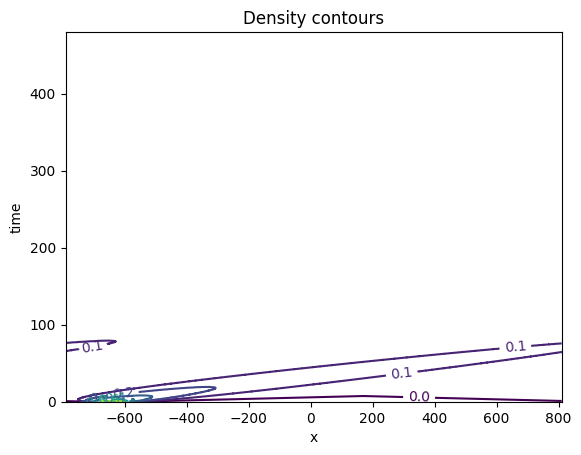

In [125]:
levels = np.linspace(0.,1.,num=11)
ct = plt.contour(xplot,tplot,np.flipud(np.rot90(rplot)), levels)
plt.clabel(ct,fmt='%1.1f')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Density contours')
plt.show()

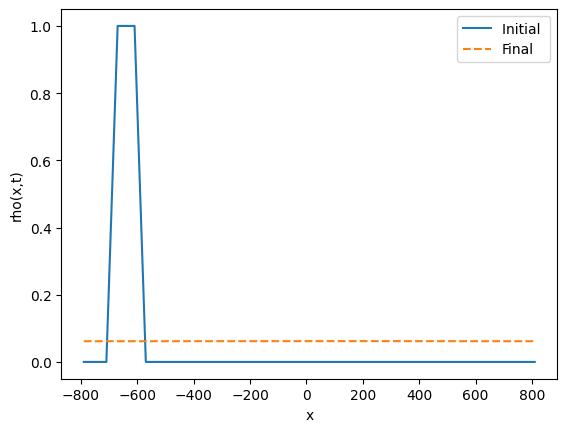

In [126]:
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot,'--')
plt.plot(xplot,rplot[:,0],'-',xplot,rplot[:,iplot-1],'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('rho(x,t)')
plt.show()

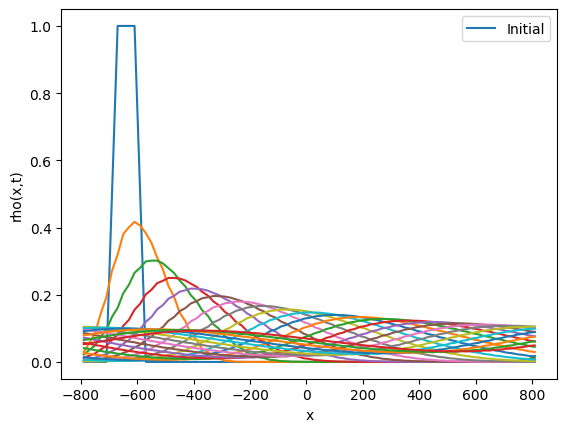

In [127]:
#plt.plot(xplot,rplot[:,0],'-',xplot,rplot,'--')
for i in range(0,int(iplot/5),20):
    plt.plot(xplot,rplot[:,i])
plt.legend(['Initial'])
plt.xlabel('x')
plt.ylabel('rho(x,t)')
plt.show()